## Decision Trees

The objective of this practice is learn about a popular algorithm called Decision Trees. I going to use an algorithm of classification for build a model based on historic data of patients and his respective medicine.

Import libraries

In [6]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import urllib.request

About Dataset: 
    You are a medical investigator collecting data for a study.
    You collect data of a group of patients, all of them had the same disease.
    During their treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.
    
   I need to build a model for find the appropriate drug for the next patient with the same disease. the conjunct of features is:
   * AGE
   * SEX
   * BLOOD PRESSURE
   * CHOLESTEROL

The objective is the drug about all patients responded

In [7]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv'
filename = 'drug200.csv'
urllib.request.urlretrieve(url, filename)

('drug200.csv', <http.client.HTTPMessage at 0x133107b4a00>)

In [8]:
df=pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [9]:
df.shape

(200, 6)

## Preprocesing

Using the dataFrame with the CSV drug.csv i going to have the next values:
* X= feature matrix
* y= answer vector

In [10]:
#Change the dataframe to vector.
X=df[["Age","Sex","BP","Cholesterol","Na_to_K"]].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [11]:
#Explore data
df.groupby(["Sex","BP","Cholesterol"]).count()

Age  Na_to_K  Drug
Sex BP     Cholesterol                    
F   HIGH   HIGH          17       17    17
           NORMAL        21       21    21
    LOW    HIGH          14       14    14
           NORMAL        14       14    14
    NORMAL HIGH          18       18    18
           NORMAL        12       12    12
M   HIGH   HIGH          18       18    18
           NORMAL        21       21    21
    LOW    HIGH          17       17    17
           NORMAL        19       19    19
    NORMAL HIGH          19       19    19
           NORMAL        10       10    10

In [12]:
df.groupby("BP").count()

,Age,Sex,Cholesterol,Na_to_K,Drug
BP,,,,,
HIGH,77,77,77,77,77
LOW,64,64,64,64,64
NORMAL,59,59,59,59,59


In [13]:
df.groupby("Cholesterol").count()

,Age,Sex,BP,Na_to_K,Drug
Cholesterol,,,,,
HIGH,103,103,103,103,103
NORMAL,97,97,97,97,97


I have categorical values like "Sex" and "BP", unfortunately, the decision tees from sklearn can't drive categorical values but i could change these values for numeric values.

In [14]:
from sklearn import preprocessing
le_sex=preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1]=le_sex.transform(X[:,1])

le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [15]:
y=df["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

## Configuring the Decision Tree

In [16]:
from sklearn.model_selection import train_test_split

Now, train_test_split return 4 different parameters. I going to call X_trainset, X_testset, y_trainset, y_testset

The parameters going to be:
X,y, test_size=0.3 and random_state=3

* test_size=The size of test dataset
* random_state=For make sure that I going to get the same divisions

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

Print the dimensions for make sure that the result going to be the real answer

In [18]:
X_train.shape

(140, 5)

In [19]:
y_train.shape

(140,)

In [20]:
X_test.shape

(60, 5)

In [21]:
y_test.shape

(60,)

## Modeling
Firs I going to create an instance of the DecisionTreeClassifier called drugTree

In [22]:
drugTree=DecisionTreeClassifier(criterion="entropy",max_depth=4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Now, adapt the data with the matrix of X_train and the answer vector y_train

In [23]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Prediction

Now, I going to make a prediction from the test dataset.

In [24]:
predTree=drugTree.predict(X_test)

now You can print the test and the predict values for comparate the prediction vs actual values

In [25]:
print(predTree[0:5])
print(y_test[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


## Evaluation

Import metrics from skleand where I going to check the precision of the model

In [26]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Precision from Decision Trees: ",metrics.accuracy_score(y_test,predTree))

Precision from Decision Trees:  0.9833333333333333


## Visualization

In [27]:
from sklearn.externals.six import StringIO
#import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 


In [32]:
conda install graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [33]:
conda install -c conda-forge pydotplus

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ivanp\anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.10.8  |       h5b45459_0         176 KB  conda-forge
    certifi-2021.10.8          |   py38haa244fe_1         145 KB  conda-forge
    conda-4.11.0               |   py38haa244fe_0        16.9 MB  conda-forge
    openssl-1.1.1l             |       h8ffe710_0         5.7 MB  conda-forge
    pydotplus-2.0.2            |             py_2          23 KB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        23.0 MB

The following NEW packages will be INSTALLED:

  pydotplus          conda-forge/noarch::pydotplus-2.0.2

In [30]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [34]:
import pydotplus
import graphviz

AttributeError: module 'graphviz.backend' has no attribute 'ENCODING'

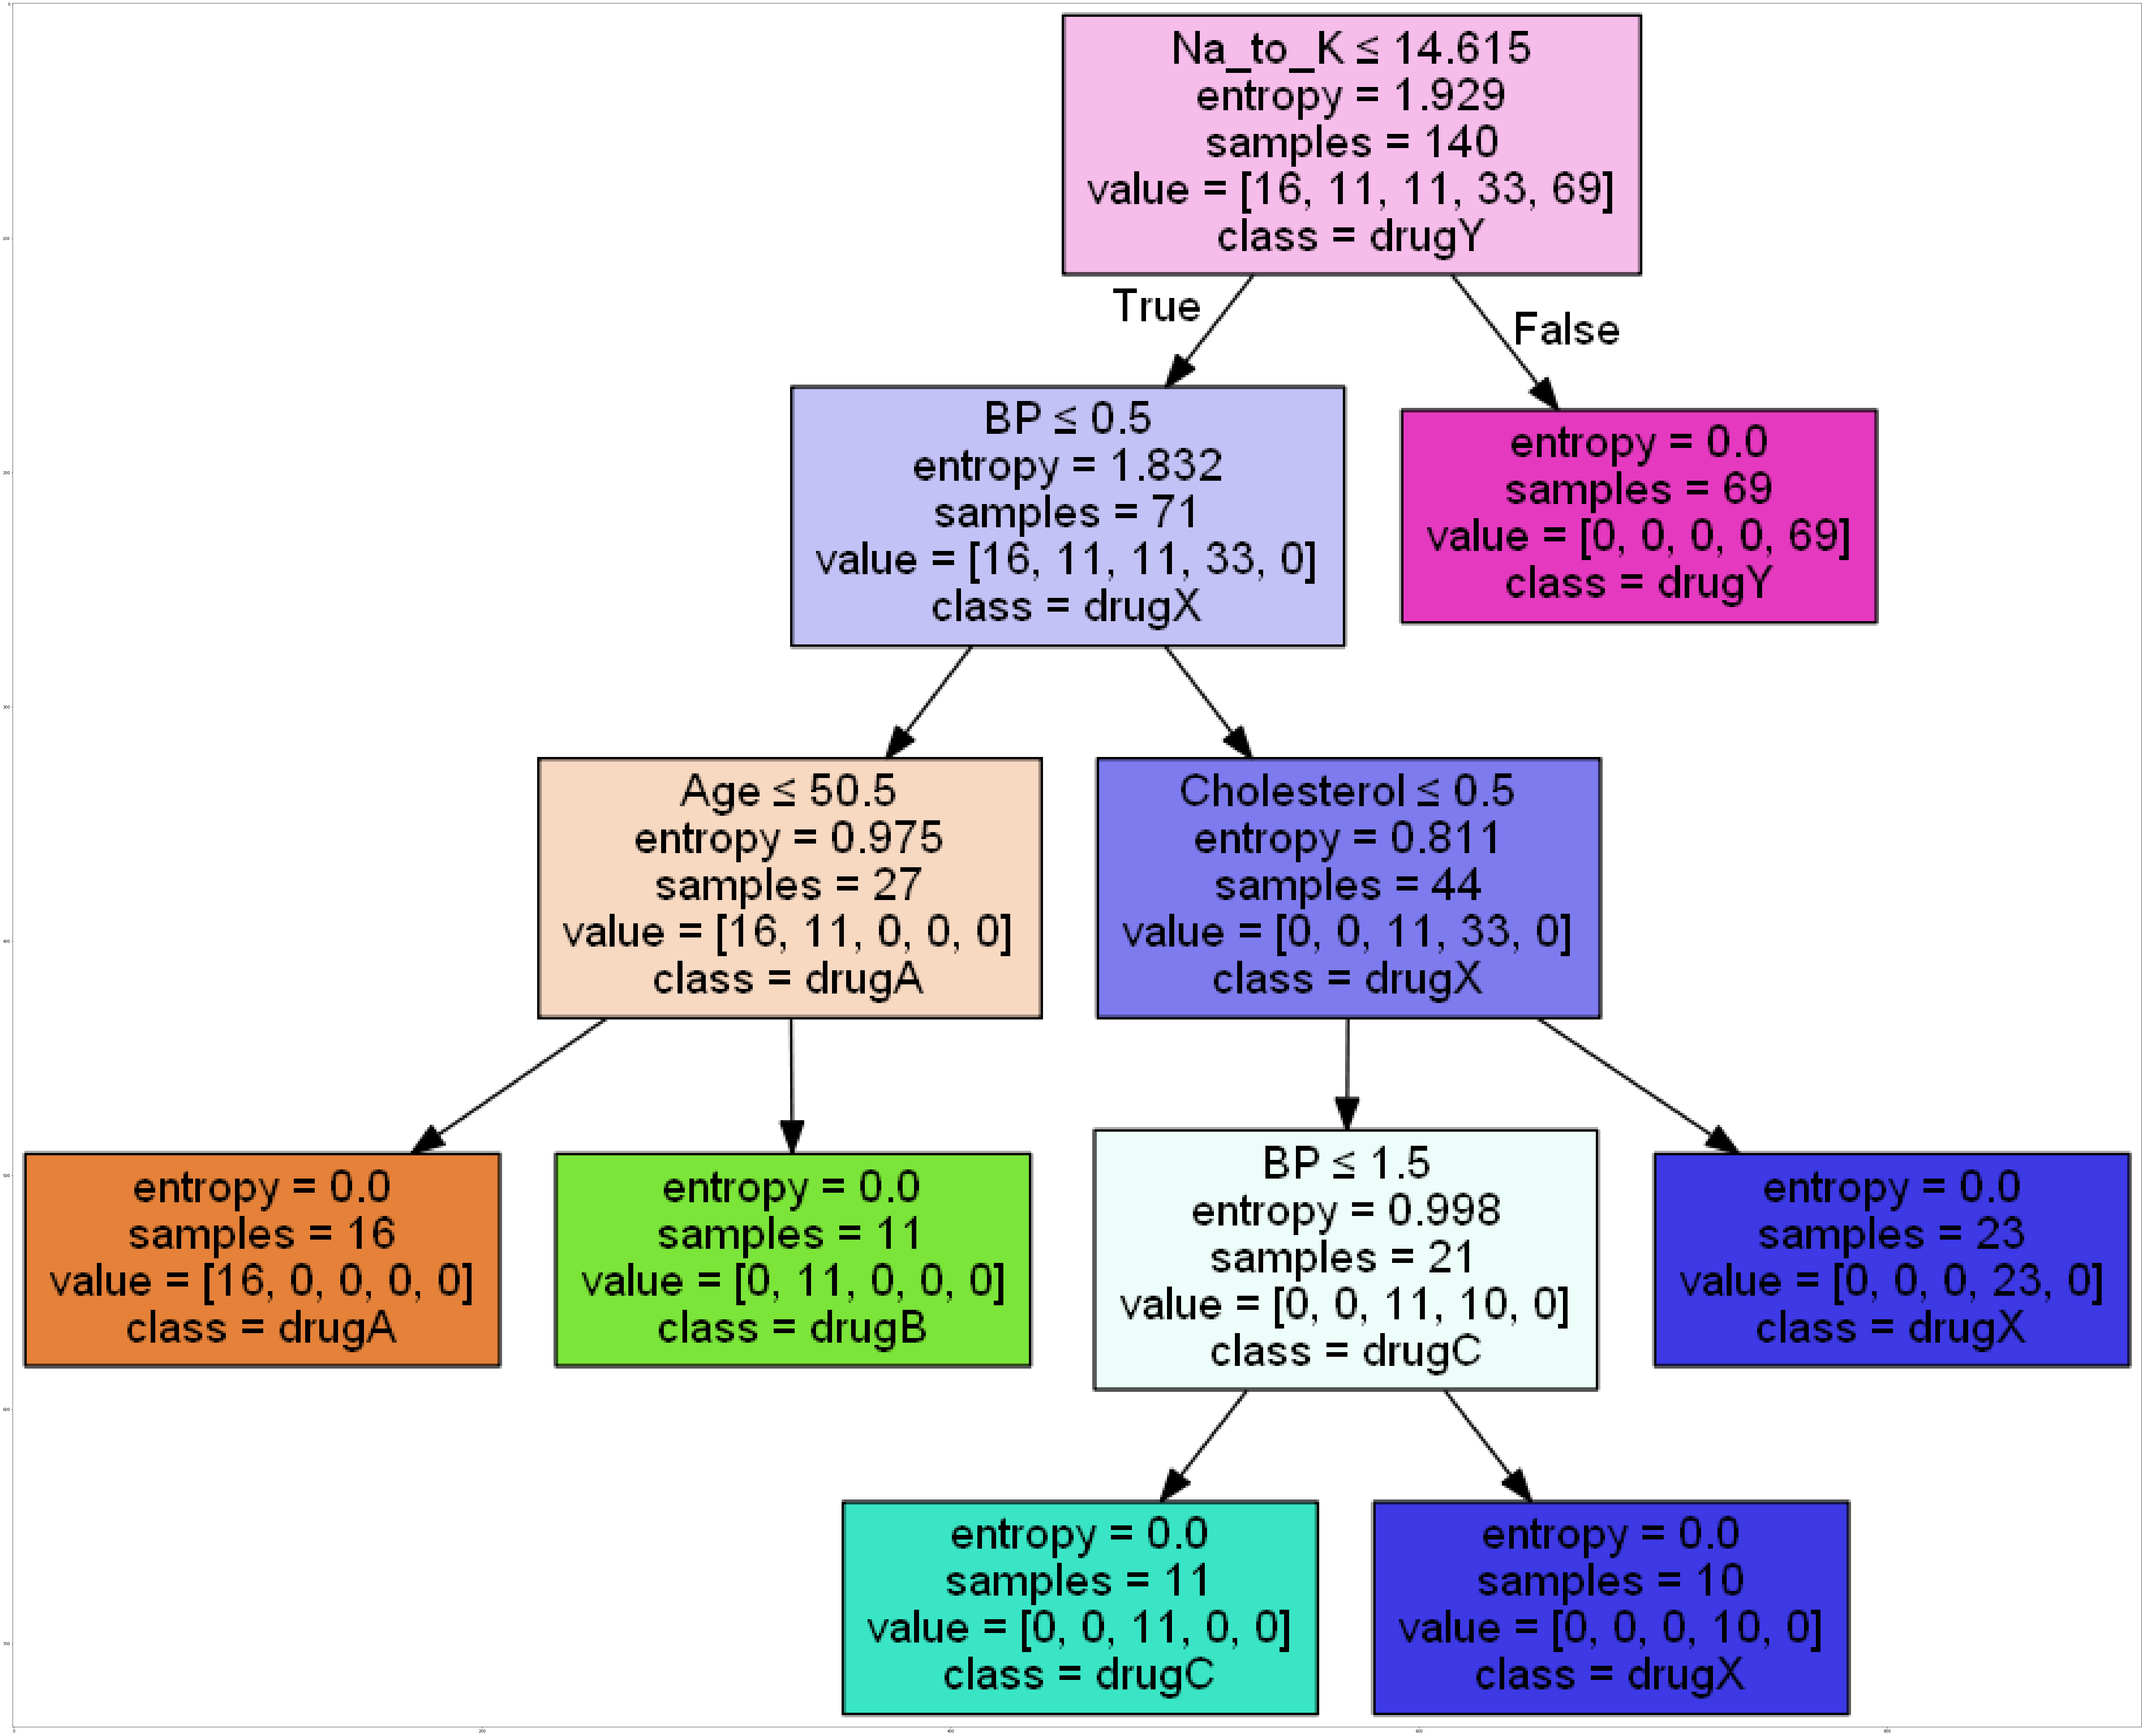

In [35]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:5]
targetNames = df["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')